In [13]:
import numpy as np
import matplotlib.pyplot as plt
def generate_1d_sine_wave(x, amplitude=1.0, frequency=1.0, phase=0.0):
    """
    Generate a 1D sine wave.
    
    Args:
        x (numpy.ndarray): Input array of x values
        amplitude (float): Amplitude of the sine wave
        frequency (float): Frequency of the sine wave
        phase (float): Phase shift of the sine wave
        
    Returns:
        numpy.ndarray: Array of sine wave values
    """
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

def generate_2d_cosine_wave(x, y, amplitude=1.0, freq_x=1.0, freq_y=1.0, phase_x=0.0, phase_y=0.0, angle=0.0):
    """
    Generate a 2D sine wave with optional rotation.
    
    Args:
        x (numpy.ndarray): Input array of x values
        y (numpy.ndarray): Input array of y values
        amplitude (float): Amplitude of the sine wave
        freq_x (float): Frequency in x direction
        freq_y (float): Frequency in y direction
        phase_x (float): Phase shift in x direction
        phase_y (float): Phase shift in y direction
        angle (float): Rotation angle in radians
        
    Returns:
        numpy.ndarray: Array of 2D sine wave values
    """
    # Rotate coordinates
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    
    return amplitude * np.cos(2 * np.pi * freq_x * x_rot + phase_x) * np.cos(2 * np.pi * freq_y * y_rot + phase_y)


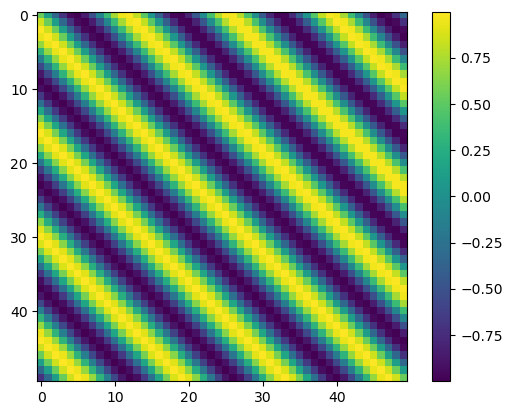

In [52]:
x, y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
sine_wave2d = generate_2d_cosine_wave(x, y, amplitude=1.0, freq_x=5.0, freq_y=0.00, phase_x=1.0, phase_y=0.0, angle=np.pi/4)

plt.imshow(sine_wave2d)
plt.colorbar()
plt.show()

In [53]:
x, y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
hf_sine_wave2d = generate_2d_cosine_wave(x, y, amplitude=1.0, freq_x=5.0, freq_y=0.00, phase_x=1.0, phase_y=0.0, angle=np.pi/4)
lf_sine_wave2d = generate_2d_cosine_wave(x, y, amplitude=1.0, freq_x=1.0, freq_y=0.00, phase_x=1.0, phase_y=0.0, angle=-np.pi/4)

In [69]:
coef = np.random.randn(500, 2) # generating variance along the two modes
coef[:, 0] = 0.02 * coef[:, 0] # the first mode (hf sine wave mode) has much lower variance
X = np.einsum('ij,jkl->ikl', coef, np.stack([hf_sine_wave2d, lf_sine_wave2d], axis=0))

In [70]:
y_val = coef @ np.array([5.0, 1.0])
y_val = y_val.reshape(-1, 1)

In [71]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

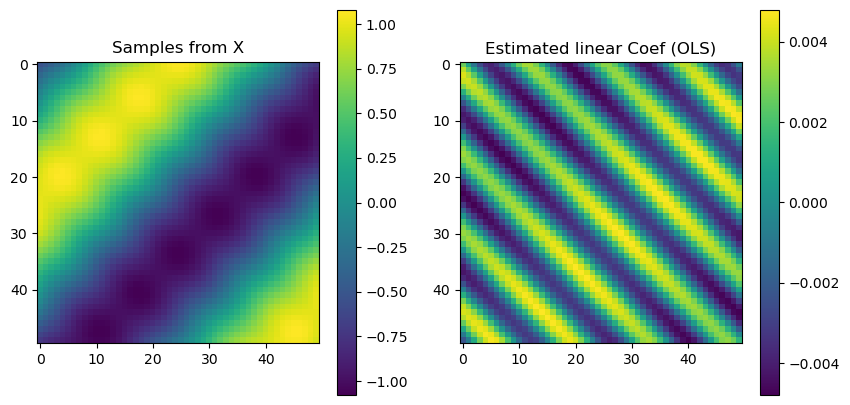

In [75]:
Xmat = X.reshape(X.shape[0], -1)
coef_est = LinearRegression().fit(Xmat, y_val).coef_
coef_est = coef_est.reshape(50, 50)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0,:,:])
plt.colorbar()
plt.title('Samples from X')
plt.subplot(1, 2, 2)
plt.imshow(coef_est)
plt.colorbar()
plt.title('Estimated linear Coef (OLS)')
plt.show()


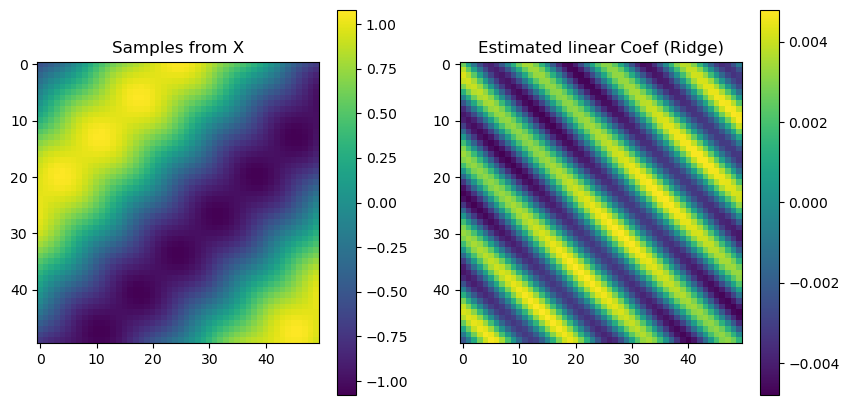

In [76]:
Xmat = X.reshape(X.shape[0], -1)
coef_est = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0]).fit(Xmat, y_val).coef_
coef_est = coef_est.reshape(50, 50)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0,:,:])
plt.colorbar()
plt.title('Samples from X')
plt.subplot(1, 2, 2)
plt.imshow(coef_est)
plt.colorbar()
plt.title('Estimated linear Coef (Ridge)')
plt.show()

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.956e-02, tolerance: 4.454e-02
  model = cd_fast.enet_coordinate_descent(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e-02, tol

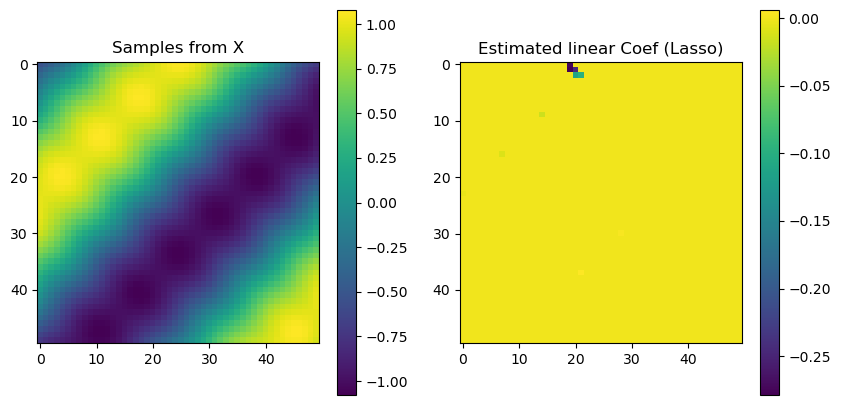

In [77]:
Xmat = X.reshape(X.shape[0], -1)
coef_est = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0]).fit(Xmat, y_val).coef_
coef_est = coef_est.reshape(50, 50)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0,:,:])
plt.colorbar()
plt.title('Samples from X')
plt.subplot(1, 2, 2)
plt.imshow(coef_est)
plt.colorbar()
plt.title('Estimated linear Coef (Lasso)')
plt.show()

In [45]:
# perform ols 
Xmat = X.reshape(1000, -1)
coef_est = np.linalg.inv(Xmat.T @ Xmat) @ Xmat.T @ y_val

Text(0.5, 1.0, 'Estimated OLS Coef')

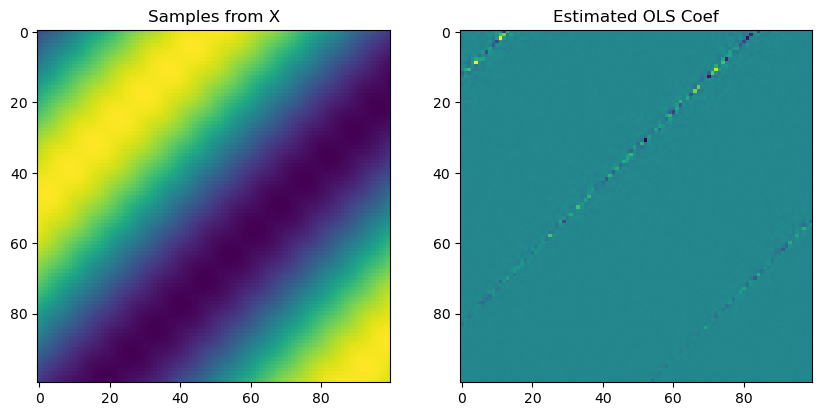

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[2, :, :])
plt.title('Samples from X')
plt.subplot(1, 2, 2)
plt.imshow(coef_est.reshape(100, 100))
plt.title('Estimated OLS Coef')

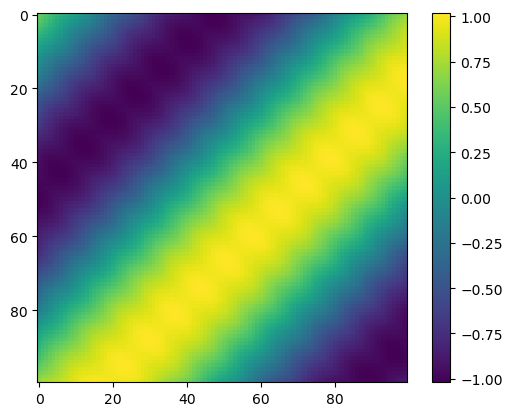

In [28]:
plt.imshow(0.02*hf_sine_wave2d + lf_sine_wave2d)
plt.colorbar()
plt.show()

In [25]:
print(np.linalg.norm(hf_sine_wave2d))
print(np.linalg.norm(lf_sine_wave2d))

70.70591767543515
70.52748369789367
